In [1]:
import pandas as pd


In [2]:
car = pd.read_csv('autos.csv')
car.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

## Columns Description ##
- ad_date -> 
- name -> Car model
- seller -> Type of seller; can be private or proffesional
- offerType -> ?
- Price
- Abtest -> ?
- Vehicle type
- yearOfRegistration, year when the car were registered.
- gearbox -> automatik or manual
- powerPS
- model
- kilometer
- monthOfRegistration, month when the car were registered.
- fuelType
- brand
- notRepairedDamage
- dateCreated
- nrOfPictures
- postalCode
- lastSeen

In [4]:
car.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [5]:
car.columns = ['ad_date', 'name', 'seller', 'offer_Type', 'price', 'abtest',
       'vehicle_type', 'year_registered', 'gearbox', 'powerPS', 'model',
       'kilometer', 'month_registered', 'fuel_type', 'brand',
       'has_damage', 'date_created', 'n_pics', 'postal_code',
       'last_seen']

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ad_date           371528 non-null  object
 1   name              371528 non-null  object
 2   seller            371528 non-null  object
 3   offer_Type        371528 non-null  object
 4   price             371528 non-null  int64 
 5   abtest            371528 non-null  object
 6   vehicle_type      333659 non-null  object
 7   year_registered   371528 non-null  int64 
 8   gearbox           351319 non-null  object
 9   powerPS           371528 non-null  int64 
 10  model             351044 non-null  object
 11  kilometer         371528 non-null  int64 
 12  month_registered  371528 non-null  int64 
 13  fuel_type         338142 non-null  object
 14  brand             371528 non-null  object
 15  has_damage        299468 non-null  object
 16  date_created      371528 non-null  obj

In [7]:
car

,ad_date,name,seller,offer_Type,price,abtest,vehicle_type,year_registered,gearbox,powerPS,model,kilometer,month_registered,fuel_type,brand,has_damage,date_created,n_pics,postal_code,last_seen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3T�RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


## Cleaning & Casting Data

In [8]:
car.describe(include='all')

,ad_date,name,seller,offer_Type,price,abtest,vehicle_type,year_registered,gearbox,powerPS,model,kilometer,month_registered,fuel_type,brand,has_damage,date_created,n_pics,postal_code,last_seen
count,371528,371528,371528,371528,3.715280e+05,371528,333659,371528.000000,351319,371528.000000,351044,371528.000000,371528.000000,338142,371528,299468,371528,371528.0,371528.00000,371528
unique,280500,233528,2,2,NaN,2,8,NaN,2,NaN,251,NaN,NaN,7,40,2,114,NaN,NaN,182806
top,2016-03-24 14:49:47,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-06 13:45:54
freq,7,657,371525,371516,NaN,192585,95894,NaN,274214,NaN,30070,NaN,NaN,223857,79640,263182,14450,NaN,NaN,17
mean,NaN,NaN,NaN,NaN,1.729514e+04,NaN,NaN,2004.577997,NaN,115.549477,NaN,125618.688228,5.734445,NaN,NaN,NaN,NaN,0.0,50820.66764,NaN
std,NaN,NaN,NaN,NaN,3.587954e+06,NaN,NaN,92.866598,NaN,192.139578,NaN,40112.337051,3.712412,NaN,NaN,NaN,NaN,0.0,25799.08247,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.00000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.000000,NaN,70.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.00000,NaN
50%,NaN,NaN,NaN,NaN,2.950000e+03,NaN,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49610.00000,NaN
75%,NaN,NaN,NaN,NaN,7.200000e+03,NaN,NaN,2008.000000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71546.00000,NaN


In [9]:
car['ad_date'] = pd.to_datetime(car['ad_date'])
car['last_seen'] = pd.to_datetime(car['last_seen'])
car['year_registered'] = pd.to_datetime(car['year_registered']) #Need to be fixed.
car['month_registered'] = pd.to_datetime(car['month_registered']) #Need to be fixed.

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ad_date           371528 non-null  datetime64[ns]
 1   name              371528 non-null  object        
 2   seller            371528 non-null  object        
 3   offer_Type        371528 non-null  object        
 4   price             371528 non-null  int64         
 5   abtest            371528 non-null  object        
 6   vehicle_type      333659 non-null  object        
 7   year_registered   371528 non-null  datetime64[ns]
 8   gearbox           351319 non-null  object        
 9   powerPS           371528 non-null  int64         
 10  model             351044 non-null  object        
 11  kilometer         371528 non-null  int64         
 12  month_registered  371528 non-null  datetime64[ns]
 13  fuel_type         338142 non-null  object        
 14  bran

In [10]:
#We deleted the %H%M%S cus' was not giving any info.
car['date_created'] = car['date_created'].apply( lambda x: x.split(' ')[0])
car['date_created'] = pd.to_datetime(car['date_created'])


In [11]:
car['has_damage'].isnull().value_counts()

False    299468
True      72060
Name: has_damage, dtype: int64

In [12]:
car['n_pics'].value_counts()
#We are dropping n_pics. It doesn't give us any info.
car.drop('n_pics', 1, inplace=True)
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ad_date           371528 non-null  datetime64[ns]
 1   name              371528 non-null  object        
 2   seller            371528 non-null  object        
 3   offer_Type        371528 non-null  object        
 4   price             371528 non-null  int64         
 5   abtest            371528 non-null  object        
 6   vehicle_type      333659 non-null  object        
 7   year_registered   371528 non-null  datetime64[ns]
 8   gearbox           351319 non-null  object        
 9   powerPS           371528 non-null  int64         
 10  model             351044 non-null  object        
 11  kilometer         371528 non-null  int64         
 12  month_registered  371528 non-null  datetime64[ns]
 13  fuel_type         338142 non-null  object        
 14  bran

In [13]:
print(car['seller'].unique())
print(car['seller'].isnull().value_counts())
print(car['seller'].value_counts())
car['seller'] = car['seller'].apply(lambda x: 'private' if x=='privat' else 'professional')
car['seller'].value_counts()

['privat' 'gewerblich']
False    371528
Name: seller, dtype: int64
privat        371525
gewerblich         3
Name: seller, dtype: int64


private         371525
professional         3
Name: seller, dtype: int64

In [14]:
car['name'] = car['name'].str.replace(r'_', ' ')

In [15]:
car['offer_Type'].value_counts() #There is less than 1% of offers that are looking for a car instead of selling.
car['offer_Type'] = car['offer_Type'].apply(lambda x: 'Sell' if x=='Angebot' else 'Looking for')
car['offer_Type']

0         Sell
1         Sell
2         Sell
3         Sell
4         Sell
          ... 
371523    Sell
371524    Sell
371525    Sell
371526    Sell
371527    Sell
Name: offer_Type, Length: 371528, dtype: object

<AxesSubplot:>

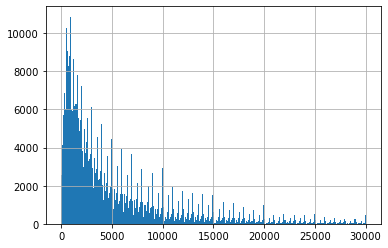

In [24]:
#Let's clean the price method.
car.drop(car[car['price'] == 0].index, inplace=True) #Erasing Price = 0

car['price'].hist(range=[0,30000], bins=300)


In [54]:

test = pd.cut(car.price,range(0,10000,200),right=False)
test.value_counts(normalize = True).sort_values()

[9600, 9800)    0.003030
[9000, 9200)    0.004062
[9200, 9400)    0.004434
[8600, 8800)    0.004782
[8000, 8200)    0.005120
[7600, 7800)    0.005167
[8200, 8400)    0.005533
[7000, 7200)    0.005563
[6600, 6800)    0.006804
[7200, 7400)    0.007149
[6000, 6200)    0.007356
[5600, 5800)    0.007602
[9400, 9600)    0.008120
[5000, 5200)    0.008651
[6200, 6400)    0.009074
[4600, 4800)    0.010017
[5200, 5400)    0.010430
[8400, 8600)    0.010551
[4000, 4200)    0.011096
[7400, 7600)    0.011593
[8800, 9000)    0.011857
[7800, 8000)    0.013693
[6400, 6600)    0.013747
[4200, 4400)    0.014894
[3600, 3800)    0.015722
[5400, 5600)    0.015776
[3000, 3200)    0.016125
[6800, 7000)    0.016825
[5800, 6000)    0.018587
[4400, 4600)    0.019141
[3200, 3400)    0.020738
[4800, 5000)    0.021569
[0, 200)        0.022631
[2600, 2800)    0.022672
[2000, 2200)    0.023034
[3400, 3600)    0.025147
[3800, 4000)    0.027018
[2200, 2400)    0.029344
[2800, 3000)    0.033125
[2400, 2600)    0.033233


<AxesSubplot:>

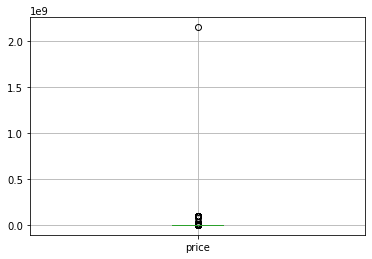

In [65]:
import matplotlib.pyplot as plt
car.boxplot(column=['price'])

In [17]:
car[car['price']==0].value_counts()

Series([], dtype: int64)

In [18]:
car.groupby(by='brand').agg({'price': ['mean']})['price'].sort_values(by='mean')

,mean
brand,
daewoo,1034.998124
rover,1585.688841
daihatsu,1761.402581
renault,2406.442857
lada,3208.568075
peugeot,3230.555597
lancia,3260.053191
opel,3340.199747
mitsubishi,3378.758597


In [19]:
car[car['brand']=='sonstige_autos'].head(20)

,ad_date,name,seller,offer_Type,price,abtest,vehicle_type,year_registered,gearbox,powerPS,model,kilometer,month_registered,fuel_type,brand,has_damage,date_created,postal_code,last_seen
60,2016-03-29 15:48:15,TAUSCHE BMW E38 740i g. SUV / GEL�NDEWAGEN LES...,private,Sell,1,control,suv,1970-01-01 00:00:00.000001994,manuell,286,NaN,150000,1970-01-01 00:00:00.000000011,NaN,sonstige_autos,NaN,2016-03-29,53721,2016-04-06 01:44:38
318,2016-03-21 14:38:37,Tauache 90ccm roller gegen auto,private,Sell,200,control,NaN,1970-01-01 00:00:00.000002009,NaN,0,NaN,10000,1970-01-01 00:00:00.000000000,NaN,sonstige_autos,NaN,2016-03-21,6493,2016-03-24 02:47:34
376,2016-03-11 21:49:52,Corvette Z06,private,Sell,49500,test,cabrio,1970-01-01 00:00:00.000002013,NaN,0,NaN,10000,1970-01-01 00:00:00.000000006,benzin,sonstige_autos,nein,2016-03-11,79774,2016-03-13 04:45:42
446,2016-03-20 20:45:27,Microcar MC1,private,Sell,3950,test,kleinwagen,1970-01-01 00:00:00.000002004,automatik,5,NaN,70000,1970-01-01 00:00:00.000000005,diesel,sonstige_autos,nein,2016-03-20,90562,2016-04-03 04:17:08
678,2016-03-30 11:55:46,Oldsmobile Cutlass,private,Sell,15000,test,coupe,1970-01-01 00:00:00.000001971,NaN,0,NaN,5000,1970-01-01 00:00:00.000000004,NaN,sonstige_autos,nein,2016-03-30,51145,2016-04-07 02:45:10
690,2016-04-01 15:56:27,Dodge RAM 1500 SLT 5 9l V8 4X4 Benzin / Gas,private,Sell,9900,test,suv,1970-01-01 00:00:00.000002000,automatik,250,NaN,150000,1970-01-01 00:00:00.000000004,lpg,sonstige_autos,nein,2016-04-01,17309,2016-04-07 14:56:03
729,2016-03-30 21:37:21,Dodge Avenger 2.7 SXT,private,Sell,6999,test,limousine,1970-01-01 00:00:00.000002010,automatik,186,NaN,125000,1970-01-01 00:00:00.000000004,benzin,sonstige_autos,nein,2016-03-30,81929,2016-04-05 11:18:33
1030,2016-03-15 16:37:22,Brilliance BS4 1.6 Comfort,private,Sell,500,control,limousine,1970-01-01 00:00:00.000002010,manuell,101,NaN,70000,1970-01-01 00:00:00.000000001,benzin,sonstige_autos,ja,2016-03-15,76829,2016-03-21 14:15:21
1044,2016-04-02 23:39:49,Barkas B1000 1 Viertakt motor,private,Sell,3900,test,kombi,1970-01-01 00:00:00.000001990,manuell,0,NaN,30000,1970-01-01 00:00:00.000000005,benzin,sonstige_autos,NaN,2016-04-02,15345,2016-04-07 01:46:23
1148,2016-03-06 22:43:51,Dodge RAM B300 Mowag Mowag Dodge V8 selten Neu...,private,Sell,11500,control,bus,1970-01-01 00:00:00.000001985,automatik,160,NaN,125000,1970-01-01 00:00:00.000000010,benzin,sonstige_autos,NaN,2016-03-06,4849,2016-04-05 18:17:04
